Author: Abraham Contreras

ML Wine Quality.

Dataset by Cortex et al. at UCI Machine Learning
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009


In this notebook, the data selected is a red wine quality dataset from Kaggle. For this example, a simple neural network of two layers is used, with an input layer of 3 variables: density, pH, alcohol percentage. The outcome is the quality of the wine.


# Import necessary packages

In [ ]:
# PyTorch packages
import torch
import torch.nn as nn

from tqdm import tqdm # loop progress bar
import gc # garbage collector

# standard packages for data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# DATA: load or generate data

In [ ]:
url = 'https://raw.githubusercontent.com/arcontreras-xp/uclchangemakers2021/main/winequality-red.csv'
winequality_red = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

# Examine data
winequality_red.info()
winequality_red.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
winequality_red[['density', 'pH', 'alcohol', 'quality']].describe()

,density,pH,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.996747,3.311113,10.422983,5.636023
std,0.001887,0.154386,1.065668,0.807569
min,0.990070,2.740000,8.400000,3.000000
25%,0.995600,3.210000,9.500000,5.000000
50%,0.996750,3.310000,10.200000,6.000000
75%,0.997835,3.400000,11.100000,6.000000
max,1.003690,4.010000,14.900000,8.000000


In [ ]:
# assign variables
x1 = winequality_red['density']
x2 = winequality_red['pH']
x3 = winequality_red['alcohol']
t = winequality_red['quality']

# convert lists to tensor
X = torch.FloatTensor(list(zip(x1, x2, x3, t)))

# split data into training/testing sets
set1, set2 = torch.utils.data.random_split(X, [1000, 599])

X_train, X_test = X[set1.indices], X[set2.indices]

Text(0, 0.5, 'Wine Quality')

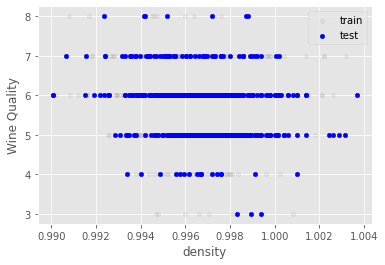

In [ ]:
# examine datasets
plt.scatter(X_train[:,0], X_train[:,3], alpha=0.1, s=20, color='grey', label='train')
plt.scatter(X_test[:,0], X_test[:,3], s=20, color='blue', label='test')
plt.legend()
plt.xlabel('density')
plt.ylabel('Wine Quality')

Text(0, 0.5, 'Wine Quality')

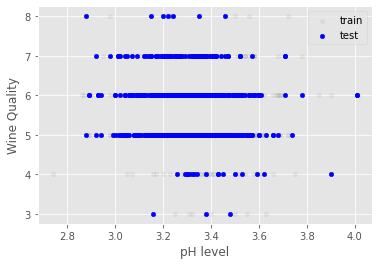

In [ ]:
plt.scatter(X_train[:,1], X_train[:,3], alpha=0.1, s=20, color='grey', label='train')
plt.scatter(X_test[:,1], X_test[:,3], s=20, color='blue', label='test')
plt.legend()
plt.xlabel('pH level')
plt.ylabel('Wine Quality')

Text(0, 0.5, 'Wine Quality')

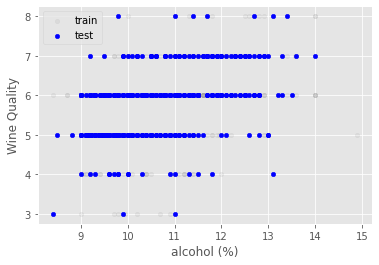

In [ ]:
plt.scatter(X_train[:,2], X_train[:,3], alpha=0.1, s=20, color='grey', label='train')
plt.scatter(X_test[:,2], X_test[:,3], s=20, color='blue', label='test')
plt.legend()
plt.xlabel('alcohol (%)')
plt.ylabel('Wine Quality')

# MODEL: define the deep learning neural network 

In [ ]:
# define deep learning model
class model(nn.Module):
  def __init__(self, input_layer, hidden_layer1, output_layer):
    super(model, self).__init__()
    self.layers = nn.Sequential( # set layers and links
      nn.Linear(input_layer, hidden_layer1),
      nn.Tanh(),
      nn.Linear(hidden_layer1, output_layer))
  
  def forward(self, x): #define forward propagation step
    output = self.layers(x)
    return output

# create variable for deep learning model
# set network parameters
# note: input_layer is set to 3 as there are three input variables we are using
neuralnetwork = model(input_layer=3, hidden_layer1=15, output_layer=1)

# define optimization algorithm of model and loss formula
optimizer = torch.optim.SGD(neuralnetwork.parameters(), lr=0.0001)
loss = nn.MSELoss()

In [ ]:
# (optional) clears some memory space
gc.collect()

113

# TRAIN: model learning step

In [ ]:
total_epoch = 100 # number of training steps
batch_size = 64 # minibatch sizes
loss_list = [] 

for epoch in tqdm(range(total_epoch)):
    permu = torch.randperm(X_train.shape[0]) # randomly rearrange training data
    for i in range(0, X_train.shape[0], batch_size): # take batches from shuffled data
        indices = permu[i:i+batch_size]
        batch_x, batch_y = X_train[indices,0:3], X_train[indices,3]
        # note: index has been changed to select three variables as input
        t = neuralnetwork.forward(batch_x.unsqueeze(1)) # forward propagation
        optimizer.zero_grad()
        l = loss(t, batch_y.unsqueeze(1)) # calculate loss 
        l.backward() # backpropagation step
        optimizer.step()

    if epoch % 1 == 0: # collect loss
        loss_list.append(l.detach())

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([40, 1])) that is different to the input size (torch.Size([40, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 100/100 [00:01<00:00, 63.03it/s]


# PLOT: generate predictions from trained model and plot performance

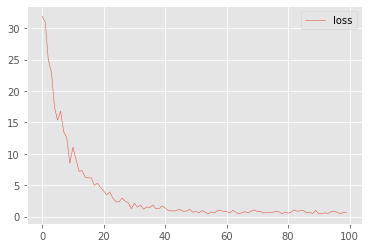

In [ ]:
# Epochs vs Loss
plt.plot(range(total_epoch), np.array(loss_list), label='loss', linewidth=0.5)
plt.legend()

In [ ]:
n_samples = 599 # number of test inputs
res = torch.empty(0) # empty tensor for results

for i in range(n_samples): # forward pass test dataset through trained model
    k = neuralnetwork(X_test[i:i+1,0:3]).detach()
    # note: index here is changed to input three variables from the test data
    res = torch.cat((res, k), 0)

Text(0.5, 0, 'density')

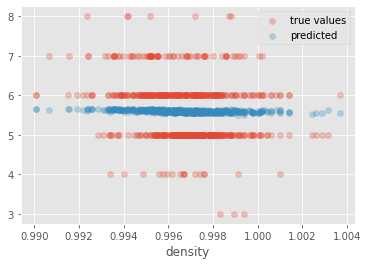

In [ ]:
# plot results
plt.scatter(X_test[:,0], X_test[:,3], alpha=0.3, label='true values')
plt.scatter(X_test[:,0] , res, alpha=0.3, label='predicted')
plt.legend()
plt.xlabel('density')

Text(0.5, 0, 'pH')

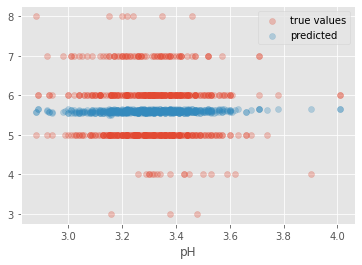

In [ ]:
plt.scatter(X_test[:,1], X_test[:,3], alpha=0.3, label='true values')
plt.scatter(X_test[:,1] , res, alpha=0.3, label='predicted')
plt.legend()
plt.xlabel('pH')

Text(0.5, 0, 'alcohol(%)')

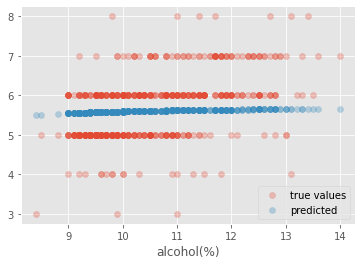

In [ ]:
plt.scatter(X_test[:,2], X_test[:,3], alpha=0.3, label='true values')
plt.scatter(X_test[:,2] , res, alpha=0.3, label='predicted')
plt.legend()
plt.xlabel('alcohol(%)')

# TEST: assess model performance

In [ ]:
# calculate error of predictions
err = X_test[:,3] - res.squeeze()
L2norm_err = np.sqrt(np.square(err))

In [ ]:
# calculate RMS score
avg_err = sum(np.sqrt(L2norm_err)) / n_samples
print("Root Mean Squared: {}.".format(avg_err))

Root Mean Squared: 0.7863247990608215.


(array([  3.,   0.,   0.,   6.,  11.,   0.,   0.,  53., 207.,   0.,   0.,
        147.,  92.,   0.,   0.,  69.,   4.,   0.,   0.,   7.]),
 array([-2.6210485 , -2.3689394 , -2.11683   , -1.8647211 , -1.612612  ,
        -1.3605028 , -1.1083937 , -0.8562846 , -0.60417545, -0.35206634,
        -0.09995723,  0.1521519 ,  0.40426102,  0.65637016,  0.9084793 ,
         1.1605884 ,  1.4126976 ,  1.6648066 ,  1.9169158 ,  2.169025  ,
         2.421134  ], dtype=float32),
 <a list of 20 Patch objects>)

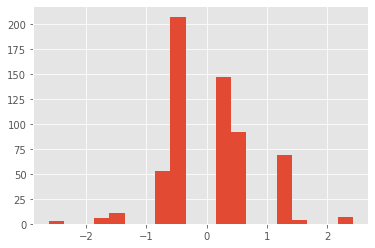

In [ ]:
# Examine errors
plt.hist(err, bins=20)